In [1]:
import pickle

f = open('../soa_paper/test34.pickle','rb')
detect_list = pickle.load(f)

proper_keys=['carry_agent', 'carry_obj', 'catch_agent', 'catch_obj', 'cut_agent', 'cut_instr', 'cut_obj', 'drink_agent', 'drink_instr', 
             'eat_agent', 'eat_instr', 'eat_obj', 'hit_agent', 'hit_instr', 'hit_obj', 'hold_agent', 'hold_obj', 'jump_agent', 
             'jump_instr', 'kick_agent', 'kick_obj', 'lay_agent', 'lay_instr', 'look_agent', 'look_obj', 'point_agent', 
             'point_instr', 'read_agent', 'read_obj', 'ride_agent', 'ride_instr', 'run_agent', 
             'sit_agent', 'sit_instr', 'skateboard_agent', 'skateboard_instr', 'ski_agent', 'ski_instr', 'smile_agent', 
             'snowboard_agent', 'snowboard_instr', 'stand_agent', 'surf_agent', 'surf_instr', 'talk_on_phone_agent', 
             'talk_on_phone_instr', 'throw_agent', 'throw_obj', 'walk_agent', 'work_on_computer_agent', 'work_on_computer_instr']


In [2]:
sorted_dict = {}
for detect in detect_list: 
    img_id = detect['image_id']
    p_bbox = detect['person_box']
    
    result = list(detect.values())[2:]
#     keys = detect.keys()[2:]
    agent_idx = None
    agent_score = -1
    obj_bbox = None
    obj_score = -1
    instr_bbox = None
    instr_score = -1
    
    for i in range(len(result)): 
        if proper_keys[i][-5:] == 'agent': 
            if result[i] > agent_score: 
                
                agent_score = result[i]
                agent_idx = i
#         elif proper_keys[i][-5:] == 'instr': 
#             if result[i][-1] > instr_score: 
#                 instr_score = result[i][-1]
#                 instr_bbox = result[i][:4]
#         elif proper_keys[i][-3:] == 'obj': 
#             if result[i][-1] > obj_score: 
#                 obj_score = result[i][-1]
#                 obj_bbox = result[i][:4]
            
    if agent_score < 0.5: 
        continue
    
    if agent_idx + 1 < len(result) and proper_keys[agent_idx+1][-5:] == 'instr': 
        instr_score = result[agent_idx+1][-1]
        instr_bbox = result[agent_idx+1][:4]
        if agent_idx + 2 < len(result) and proper_keys[agent_idx+2][-3:] == 'obj': 
            obj_score = result[agent_idx+2][-1]
            obj_bbox = result[agent_idx+2][:4]
    elif agent_idx + 1 < len(result) and proper_keys[agent_idx+1][-3:] == 'obj': 
        obj_score = result[agent_idx+1][-1]
        obj_bbox = result[agent_idx+1][:4]
            
    
    if not str(img_id) in sorted_dict: 
        sorted_dict[str(img_id)] = {}
        sorted_dict[str(img_id)]['person_box'] = []
        sorted_dict[str(img_id)]['agent'] = [] #TODO: add chosen agent
        sorted_dict[str(img_id)]['instr'] = [] #TODO: add chosen instr bbox
        sorted_dict[str(img_id)]['obj'] = [] #TODO: add chosen obj bbox
        sorted_dict[str(img_id)]['scores'] = []
        
    sorted_dict[str(img_id)]['person_box'].append(p_bbox)
    sorted_dict[str(img_id)]['agent'].append(agent_idx) #TODO: add chosen agent
    sorted_dict[str(img_id)]['instr'].append(instr_bbox) #TODO: add chosen instr bbox
    sorted_dict[str(img_id)]['obj'].append(obj_bbox) #TODO: add chosen obj bbox
    sorted_dict[str(img_id)]['scores'].append([agent_score, instr_score, obj_score]) #TODO: add chosen scores in order: agent, instr, object

In [7]:
import json
import numpy as np
OBJ_PATH_test_s= '../All_data/Object_Detections_vcoco/val/' 

selected_detec = {}
for i in list(sorted_dict.keys()): 
    select = []
    cur_obj_path_s = OBJ_PATH_test_s + "COCO_val2014_%.12i.json" % (int(i))
    with open(cur_obj_path_s) as fp:detections = json.load(fp)
    H = detections['H']
    W = detections['W']
    for det in detections['detections']: 
        new_det = {}
        if det['class_str'] == 'person': 
            continue
        if det['score'] < 0.5: 
            continue
        new_det['class_str'] = det['class_str']
        new_det['score'] = det['score']
        new_det['class_no'] = det['class_no']
        top,left,bottom,right = det['box_coords']
        left, top, right, bottom = left*W, top*H, right*W, bottom*H
        new_det['box_coords'] = [left,top,right,bottom]
#         det['box_coords'][0] =  det['box_coords'][0] * W
#         det['box_coords'][1] =  det['box_coords'][1] * H
#         det['box_coords'][2] =  det['box_coords'][2] * W
#         det['box_coords'][3] =  det['box_coords'][3] * H
        select.append(new_det)
    selected_detec[i] = select
    # add resolution

In [8]:
with open('VSG_detec.json','w') as f: 
    json.dump(selected_detec,f)

In [ ]:
def iou_numpy(outputs: np.array, labels: np.array):
    outputs = outputs.squeeze(1)
    
    intersection = (outputs & labels).sum((1, 2))
    union = (outputs | labels).sum((1, 2))
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    
    thresholded = np.ceil(np.clip(20 * (iou - 0.5), 0, 10)) / 10
    
    return thresholded  # Or thresholded.mean()

In [6]:
for i in list(sorted_dict.keys()): 
    for ins in sorted_dict[i]['instr']: 
        if ins == None: 
            continue
        for j in selected_detec[i]['box_coords']

In [9]:
len(sorted_dict.keys())

4253

In [5]:
for i in sorted_dict['565248']['instr']: 
    print(i)

None
[93.44000244140625, 289.3169860839844, 517.760009765625, 472.85699462890625]
[24.31999969482422, 360.3179931640625, 446.0799865722656, 478.65301513671875]
[93.44000244140625, 289.3169860839844, 517.760009765625, 472.85699462890625]


In [6]:
for i in sorted_dict['565248']['obj']: 
    print(i)

None
None
None
None


In [7]:
from pycocotools.coco import COCO
import numpy as np
import os
import cv2
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
cocoRoot = '../All_data/v-coco/coco-data/' # TODO: change root
dataType = "val2014" # TO change to 2014 train
annFile = os.path.join(cocoRoot, f'annotations/instances_{dataType}.json')

In [8]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=4.06s)
creating index...
index created!


In [9]:
imginfo = coco.loadImgs(565248)[0]
imPath = os.path.join(cocoRoot, dataType, imginfo['file_name'])
boxes = sorted_dict['565248']['person_box']
agents = sorted_dict['565248']['agent']

In [10]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)

def draw_image(img_path, boxes, box_labels):
#     size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path)
    num_obj = len(boxes)
#     for i in range(num_obj):
#         info = str(i) + '_' + box_labels[i]
    for i in range(num_obj): 
        info = str(i) + '_' + proper_keys[box_labels[i]][:-6]
        if boxes[i] == None: continue
        draw_single_box(pic, boxes[i], draw_info=info)
        print(proper_keys[box_labels[i]][:-6])
    display(pic)
#     print('*' * 50)
#     print_list('box_labels', box_labels, box_scores)
#     print('*' * 50)
#     print_list('rel_labels', rel_labels, rel_scores)
    
    return None

stand
sit
ride
ride


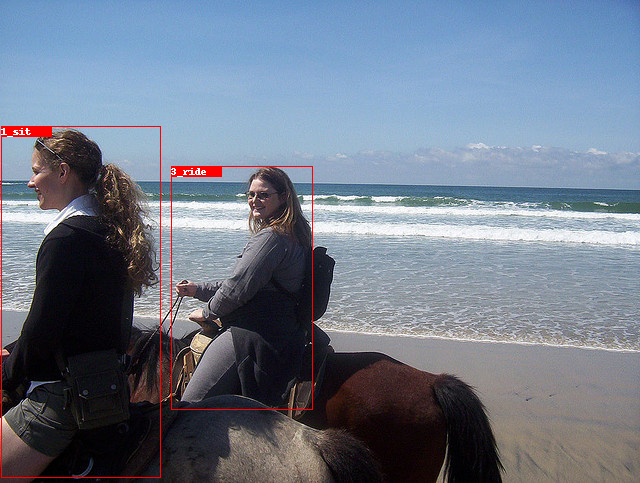

In [44]:
draw_image(imPath, boxes, agents)

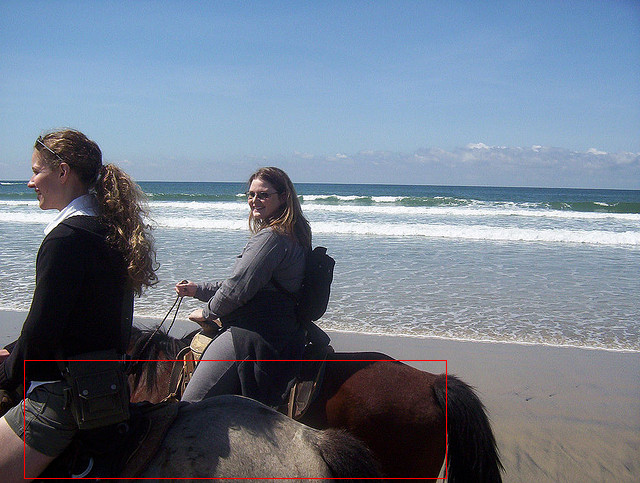

In [15]:
image = Image.open(imPath)
draw_single_box(image, selected_detec['565248'][0]['box_coords'])
display(image)

NameError: name 'imPath' is not defined